# Atividade semana 4 - Transfer Learning

João Victor Cordeiro - 123131

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importando e padronizando os dados

In [2]:
# carregando dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Convertendo valores dos pixels em float
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalização para escala [0-1]
trainX = trainX / 255.0
testX = testX / 255.0

# remove a segunda dimensão
trainY = trainY.squeeze()
testY = testY.squeeze()

# transformando a variável alvo (target) para uma codificação one hot
trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)

In [4]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(trainX)

# Construindo o modelo usando Transfer Learning

In [5]:
pre_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = Sequential()

# Mantem apenas as ultimas 4 camadas do VGG16 ativas para o treinamento
for index, layer in enumerate(pre_model.layers):
    if index < len(pre_model.layers) - 4:
        layer.trainable = False
    model.add(layer)

model.add(Flatten())
model.add(Dense(512, activation='relu', name='hidden1'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', name='hidden2'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax', name='predictions'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 7,475,978 (28.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

# Treinamento do modelo

In [7]:
batch_size = 32
epochs = 15

history = model.fit(
    datagen.flow(trainX, trainY, batch_size=batch_size),
    validation_data=(testX, testY),
    epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.3797 - loss: 1.6900 - val_accuracy: 0.6751 - val_loss: 0.9668
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6284 - loss: 1.1242 - val_accuracy: 0.6889 - val_loss: 0.9198
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.6569 - loss: 1.0414 - val_accuracy: 0.6638 - val_loss: 0.9989
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6714 - loss: 0.9917 - val_accuracy: 0.7038 - val_loss: 0.8663
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6844 - loss: 0.9533 - val_accuracy: 0.7119 - val_loss: 0.8795
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.6950 - loss: 0.9198 - val_accuracy: 0.7027 - val_loss: 0.8913
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6969 - loss: 0.9119 - val_accuracy: 0.6983 - val_loss: 0.9201
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7029 - loss: 0.90

In [8]:
loss, acc = model.evaluate(testX, testY)
print(f"Test Accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7313 - loss: 0.8190
Test Accuracy: 0.7328


In [9]:
model.save("cifar10_model_transfer_learning.h5")

# Testando modelo no conjunto de teste

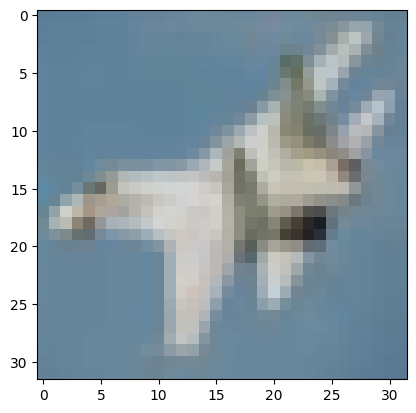

In [10]:
plt.imshow(testX[10], cmap='gray');

In [11]:
pred = np.argmax(model.predict(np.expand_dims(testX[10], axis=0)))

pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


np.int64(0)

In [12]:
cifar10_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

'Predição: {pred}'.format(pred=cifar10_labels[pred])

'Predição: airplane'

# Conclusão

Na primeira avaliação, foi usado uma CNN simples feita do zero e consegui uma acurácia média de 69,4%. O modelo era leve e rápido, mas precisava aprender tudo do zero, o que limitou a performance.

Nessa avaliação, foi usado a técnica de transfer learning usando o VGG16 pré-treinado no ImageNet, deixando apenas as 4 últimas camadas treináveis. Isso permitiu aproveitar todo o conhecimento visual que o modelo já tinha, ajustando só a parte final para o CIFAR-10. O resultado foi melhor: 73,28% de acurácia no teste, um ganho bom e considerável.

A melhora veio justamente porque o VGG16 já entende muito bem padrões visuais como bordas, texturas e formas, acelerando o aprendizado. Ainda assim, o ganho não foi gigante, possivelmente por causa da resolução baixa (32x32) e das diferenças entre o CIFAR-10 e o ImageNet.

| Técnica                   | Acurácia | Tempo de Treinamento | Tamanho do Modelo | Generalização     |
| ------------------------- | -------- | -------------------- | ----------------- | ----------------- |
| CNN do zero               | \~69%    | Mais rápido          | Leve              | Boa, mas limitada |
| Transfer Learning (VGG16) | \~73%    | Mais lento           | Pesado            | Melhor            |
